# Finding the best market to advertise in

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [15]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [16]:
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
survey_data = pd.read_csv(direct_link, low_memory=0)  # low_memory = False to silence dtypes warning

The survey data contains responses from freeCodeCamp's 2017 survey of 20,000+ developers. More details can be found online https://github.com/freeCodeCamp/2017-new-coder-survey
Ultimately we'd like to use existing survey data rather than performing our own, since that's easier and cheaper. 


In [17]:
survey_data.shape

(18175, 136)

In [18]:
survey_data.head(100
                 )

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
96,28.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
97,30.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,22.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
survey_data.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

There's 136 columns, and ~18175 survey responses. Many of the columns appear to be binary flags indicating a survey respondent has or hasn't attended some kind of bootcamp or event. The columns can be broken down into 3 or 4 major types
- Demographic (age, location, marital status, children)
- ID based (unique IDs generated when survey was submitted/taken)
- Job preference/employment preferences and info (types of job, income, expected income)
- Awareness of types of media/sites (Youtube channels, podcasts, etc)



In [20]:
# First, handling missing values
job_role_interest = survey_data['JobRoleInterest'].dropna()

# Checking the frequency of unique interests (including those that mention multiple roles)
job_role_interest_frequency = job_role_interest.str.split(',').explode().value_counts(normalize=True) * 100

# Display the frequency table
job_role_interest_frequency.head(10)

JobRoleInterest
 Full-Stack Web Developer      11.017699
   Front-End Web Developer     10.119469
 Back-End Web Developer         8.836283
   Mobile Developer             7.672566
Full-Stack Web Developer        7.557522
  Front-End Web Developer       5.513274
 Game Developer                 5.141593
   Data Scientist               4.955752
   User Experience Designer     4.769912
 Information Security           4.362832
Name: proportion, dtype: float64

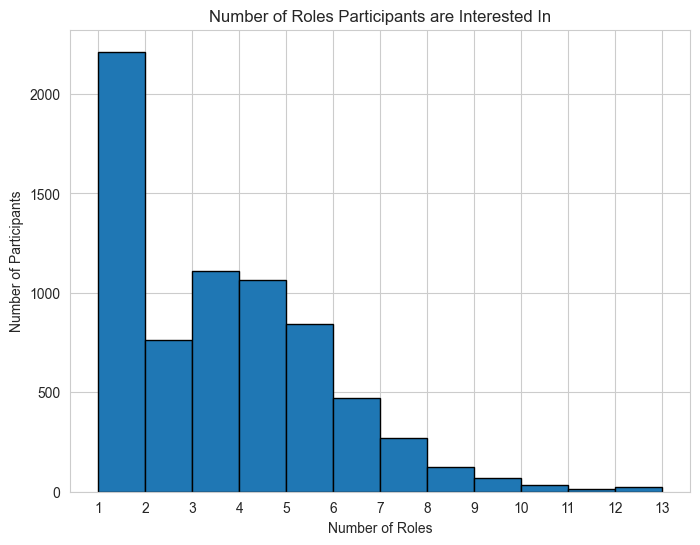

86.2700228832952


In [21]:
# Count the number of roles mentioned by each participant
job_role_interest_count = job_role_interest.str.split(',').apply(len)

# Plotting the distribution of number of roles participants are interested in
plt.figure(figsize=(8, 6))
plt.hist(job_role_interest_count, bins=range(1, job_role_interest_count.max() + 1), edgecolor='black')
plt.title('Number of Roles Participants are Interested In')
plt.xlabel('Number of Roles')
plt.ylabel('Number of Participants')
plt.xticks(range(1, job_role_interest_count.max() + 1))
plt.show()

# Step 3: Calculate how many people are interested in at least one of 'web development' or 'mobile development'

# Defining the relevant roles
web_mobile_roles = ['Web Developer', 'Full-Stack Web Developer', 'Front-End Web Developer', 'Back-End Web Developer',
                    'Mobile Developer']

# Filtering the participants who are interested in any of these roles
interested_in_web_mobile = job_role_interest.str.contains('|'.join(web_mobile_roles), case=False, na=False)

# Calculating percentage of participants interested in web or mobile development
percentage_web_mobile = interested_in_web_mobile.mean() * 100

print(percentage_web_mobile)

Survey participants are only interested in many types of roles, with the mean number of roles about 3, with a large number of respondents only indicating 1.
Approximately 86% of respondents are interested in web or mobile development

In [22]:
# Step 1: Dropping participants without a job role interest
survey_good = survey_data.dropna(subset=['JobRoleInterest'])

# Step 2: Generating a frequency table for the 'CountryLive' variable (absolute and relative frequencies)
country_live_abs_freq = survey_good['CountryLive'].value_counts()
country_live_rel_freq = survey_good['CountryLive'].value_counts(normalize=True) * 100

# Creating a DataFrame to display both absolute and relative frequencies
country_live_freq_table = pd.DataFrame({
        'Absolute Frequency'    : country_live_abs_freq,
        'Relative Frequency (%)': country_live_rel_freq
}
)

# Displaying the top of the frequency table
country_live_freq_table.head()


,Absolute Frequency,Relative Frequency (%)
CountryLive,,
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765


The USA is obviously the first market, with an order of magnitude more than the next one. Whether India is the next best market to advertise in might depend on the self reported income. The size of the addressable markets for each is what we care about. Working out the mean income of respondents by the total number of respondents for each country will give us the size of the addressable market.


In [23]:
# Step 2: Cleaning and preprocessing the 'Income' column
# Converting the 'Income' column to numeric and dropping missing values
survey_good['Income'] = pd.to_numeric(survey_good['Income'], errors='coerce')
survey_data_with_income = survey_good.dropna(subset=['Income'])

# Step 3: Calculating the average income per country
average_income_by_country = survey_data_with_income.groupby('CountryLive')['Income'].mean().sort_values(ascending=False)

# Displaying the top countries with the highest average income
average_income_by_country.head()

# Step 4: Calculate the crude market size for each country
# Multiplying the average income by the number of respondents from each country

# Getting the number of respondents from each country
respondents_by_country = survey_data_with_income['CountryLive'].value_counts()

# Calculating the crude addressable market by multiplying average income by the number of respondents
crude_market_size_by_country = average_income_by_country * respondents_by_country

# Creating a DataFrame to store the results
crude_market_size_df = pd.DataFrame({
        'Average Income'       : average_income_by_country,
        'Number of Respondents': respondents_by_country,
        'Crude Market Size'    : crude_market_size_by_country
}
).sort_values(by='Crude Market Size', ascending=False)

# Displaying the top results
crude_market_size_df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_12540\2923402238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_good['Income'] = pd.to_numeric(survey_good['Income'], errors='coerce')


,Average Income,Number of Respondents,Crude Market Size
CountryLive,,,
United States of America,43505.099941,1691,73567124.0
United Kingdom,37774.617284,162,6119488.0
Canada,32427.788462,104,3372490.0
Australia,46661.215686,51,2379722.0
India,40183.384615,52,2089536.0


The size of the markets indicate the USA is worth about 70m, and the UK is next at 6m

In [24]:
survey_good['MonthsProgramming'].replace(0, 1, inplace=True)
survey_good['MoneyPerMonth'] = survey_good['MoneyForLearning'] / survey_good['MonthsProgramming']
survey_good['MoneyPerMonth'].isnull().sum()


C:\Users\User\AppData\Local\Temp\ipykernel_12540\2735179545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey_good['MonthsProgramming'].replace(0,1, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12540\2735179545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_good['MonthsProgramming'].replace(0,1, inplace=True)
C

np.int64(675)

In [25]:
survey_good = survey_good[survey_good['MoneyPerMonth'].notnull()]
survey_good = survey_good[survey_good['CountryLive'].notnull()]
survey_good['CountryLive'].value_counts().head()

CountryLive
United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: count, dtype: int64

The USA and India are the top 2 markets by count, but evaluating based on addressable market

In [26]:
# Filter out non-numeric data in 'MoneyPerMonth'
survey_good['MoneyPerMonth'] = pd.to_numeric(survey_good['MoneyPerMonth'],
                                             errors='coerce'
                                             )

# Drop rows with NaN values created by coercion
survey_good = survey_good.dropna(subset=['MoneyPerMonth'])

# Group by 'CountryLive' and calculate the mean
mean_money_per_month_by_country = survey_good.groupby('CountryLive')['MoneyPerMonth'].mean()

# List of top countries
top_countries = ['United States of America', 'India', 'United Kingdom', 'Canada']

# Use the extracted variable
print(mean_money_per_month_by_country.loc[top_countries])

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64


Seems odd that India has a higher mean than UK and Canada. Data might be sparse, or might be some outliers in the India dataset skewing the mean

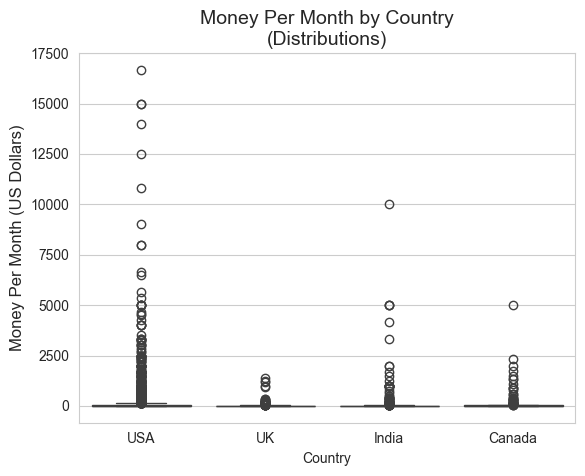

In [32]:
import seaborn as sns

countries_4 = only_4 = survey_good[survey_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada'
)]

sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=countries_4)
plt.title("Money Per Month by Country\n(Distributions)", fontsize=14)
plt.ylabel("Money Per Month (US Dollars)", fontsize=12)
plt.xlabel('Country')
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada'])
plt.show()

The USA has two outliers spending well over 20,000 a month


In [30]:
survey_good = survey_good[survey_good['MoneyPerMonth'] < 20000]

# Filter out non-numeric data in 'MoneyPerMonth'
survey_good['MoneyPerMonth'] = pd.to_numeric(survey_good['MoneyPerMonth'],
                                             errors='coerce'
                                             )

# Drop rows with NaN values created by coercion
survey_good = survey_good.dropna(subset=['MoneyPerMonth'])

# Group by 'CountryLive' and calculate the mean
mean_money_per_month_by_country = survey_good.groupby('CountryLive')['MoneyPerMonth'].mean()

# List of top countries
top_countries = ['United States of America', 'India', 'United Kingdom', 'Canada']

# Use the extracted variable
print(mean_money_per_month_by_country.loc[top_countries])

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64


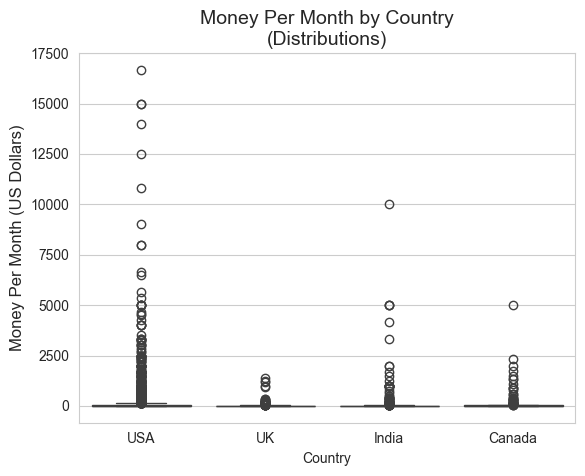

In [33]:
countries_4 = only_4 = survey_good[survey_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada'
)]

sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=countries_4)
plt.title("Money Per Month by Country\n(Distributions)", fontsize=14)
plt.ylabel("Money Per Month (US Dollars)", fontsize=12)
plt.xlabel('Country')
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada'])
plt.show()

India has two outliers we should investigate

In [35]:
india_outliers = countries_4[
    (countries_4['CountryLive'] == 'India') &
    (countries_4['MoneyPerMonth'] >= 2500)]
india_outliers


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


There are 4 respondents that have indicated over 20,000 for learning, which seems like a university degree.

In [37]:
us_outliers = countries_4[
    (countries_4['CountryLive'] == 'United States of America') &
    (countries_4['MoneyPerMonth'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


The money per month for each of these outliers indicates they are potentially filling in the survey wrong. Half have not indicated they have attended a bootcamp. Similar to India, they may have counted tuition as part of the monthly spending.

In [40]:
no_bootcamp = countries_4[
    (countries_4['CountryLive'] == 'United States of America') &
    (countries_4['MoneyPerMonth'] >= 6000) &
    (countries_4['AttendedBootcamp'] == 0)
    ]

countries_4 = countries_4.drop(no_bootcamp.index)

# Remove the respondents that had been programming for less than 3 months
less_than_3_months = countries_4[
    (countries_4['CountryLive'] == 'United States of America') &
    (countries_4['MoneyPerMonth'] >= 6000) &
    (countries_4['MonthsProgramming'] <= 3)
    ]

countries_4 = countries_4.drop(less_than_3_months.index)
countries_4 = countries_4.drop(india_outliers.index)

In [47]:
# Examine the extreme outliers for Canada
canada_outliers = countries_4[
    (countries_4['CountryLive'] == 'Canada') &
    (countries_4['MoneyPerMonth'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [48]:
countries_4 = countries_4.drop(canada_outliers.index)

# Filter out non-numeric data in 'MoneyPerMonth'
countries_4['MoneyPerMonth'] = pd.to_numeric(countries_4['MoneyPerMonth'],
                                             errors='coerce'
                                             )

# Drop rows with NaN values created by coercion
countries_4 = countries_4.dropna(subset=['MoneyPerMonth'])

# Group by 'CountryLive' and calculate the mean
mean_money_per_month_by_country = countries_4.groupby('CountryLive')['MoneyPerMonth'].mean()

# List of top countries
top_countries = ['United States of America', 'India', 'United Kingdom', 'Canada']

# Use the extracted variable
print(mean_money_per_month_by_country.loc[top_countries])

CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: MoneyPerMonth, dtype: float64


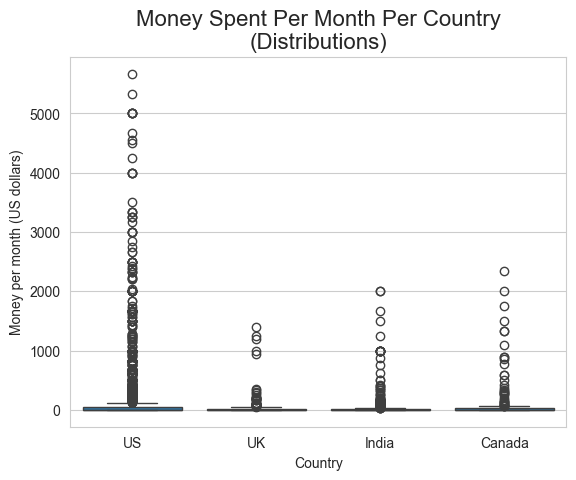

In [49]:
# Visualize the distributions again
sns.boxplot(y='MoneyPerMonth', x='CountryLive',
            data=countries_4
            )
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize=16
          )
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])  # avoids tick labels overlap
plt.show()

## Best Markets
The US is an obvious market with an average spend of \\$143 
Subscriptions are sold at \\$59 a month, so Canada and India seem viable to advertise in. The UK wihth an average spend of \\$45 is not a good target at the moment.

There are twice as many potential customers in India compared to Canada based on this survey data. Assuming the average spend in India is correct, it could be a good second target market.

We could split the advertising budget by the size of the addressable market calculated earlier. The number of respondents that reported their income might be a better proxy. In Canada, the average income is \\$32,000 compared to Australia, India and UK. Relying on income data from a survey of only 20,000 people globally is susceptible to a fair bit of noise. India has a very large population, but we don't know if this survey is representative of that population of it's just sampling the upper class.



In [53]:
countries_4['CountryLive'].value_counts(normalize=True) * 100

crude_market_size_df

,Average Income,Number of Respondents,Crude Market Size
CountryLive,,,
United States of America,43505.099941,1691,73567124.0
United Kingdom,37774.617284,162,6119488.0
Canada,32427.788462,104,3372490.0
Australia,46661.215686,51,2379722.0
India,40183.384615,52,2089536.0
...,...,...,...
Liberia,9600.000000,1,9600.0
Haiti,8500.000000,1,8500.0
Cuba,7200.000000,1,7200.0
